In [1]:
#Load the necessary modules 
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [2]:
# Load the protein-protein interaction network 
G = nx.read_edgelist("Human-PPI.txt")

In [3]:
# Calculate the degree for each protein in the network and store it in a dictionary.
degree_dict = dict(G.degree())

In [4]:
# Calculate the clustering coefficient for each protein and store it in a dictionary.
clustering_dict = nx.clustering(G)

In [5]:
# Calculate the average clustering coefficient for the network.
average_clustering = sum(clustering_dict.values()) / len(clustering_dict)

In [6]:
#print the average clustering coefficient
print(f"Average Clustering Coefficient: {average_clustering:.4f}")

Average Clustering Coefficient: 0.2098


In [7]:
# Iterate over each protein and print its degree and clustering coefficient.
for protein in G.nodes():
    print(f"Protein: {protein}, Degree: {degree_dict[protein]}, Clustering Coefficient: {clustering_dict[protein]}")

Protein: OFFICIAL_SYMBOL_A, Degree: 1, Clustering Coefficient: 0
Protein: OFFICIAL_SYMBOL_B, Degree: 1, Clustering Coefficient: 0
Protein: 1810055G02Rik, Degree: 3, Clustering Coefficient: 0
Protein: MPRIP, Degree: 15, Clustering Coefficient: 0.13333333333333333
Protein: RAI14, Degree: 15, Clustering Coefficient: 0.12380952380952381
Protein: TPM1, Degree: 15, Clustering Coefficient: 0.10256410256410256
Protein: 2810046L04Rik, Degree: 2, Clustering Coefficient: 0
Protein: ARF1, Degree: 33, Clustering Coefficient: 0.06451612903225806
Protein: ARF3, Degree: 15, Clustering Coefficient: 0.09523809523809523
Protein: 4922501C03Rik, Degree: 1, Clustering Coefficient: 0
Protein: CPNE4, Degree: 20, Clustering Coefficient: 0
Protein: 4930572J05Rik, Degree: 6, Clustering Coefficient: 0
Protein: C8orf55, Degree: 2, Clustering Coefficient: 0
Protein: PRKDC, Degree: 119, Clustering Coefficient: 0.0816386678455644
Protein: SPRR2B, Degree: 3, Clustering Coefficient: 0
Protein: SPRR2D, Degree: 5, Cluste

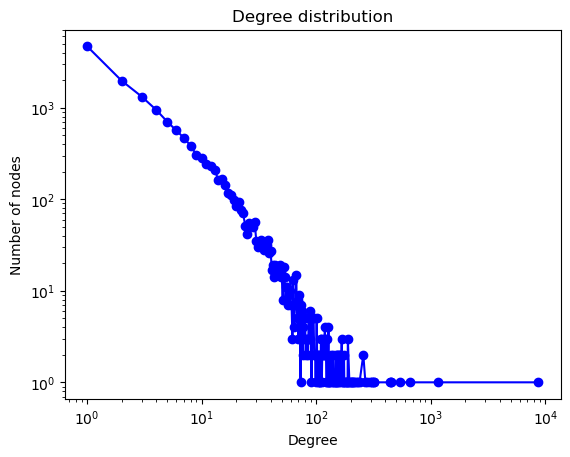

In [8]:
# Obtain a list of unique degree values and compute the histogram of degree distribution.
degree_values = sorted(set(degree_dict.values()))
histogram = [list(degree_dict.values()).count(x) for x in degree_values]

# Visualize the degree distribution using a log-log plot to identify scale-free properties.
plt.figure()
plt.loglog(degree_values, histogram, 'bo-')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [9]:
# Define a function to load a network from an edgelist file.
def load_network(file_path):
    return nx.read_edgelist(file_path)

# Define a function to load a list of proteins from a file.
def load_protein_list(filepath):
    with open(filepath) as file:
        pt = [line.strip() for line in file if line.strip()]
    return pt

# Define a function to calculate path lengths for all pairs of nodes in a given graph.
def calculate_path_lengths(G):
    path_lengths = []
    for source in G.nodes():
        lengths = nx.single_source_shortest_path_length(G, source)
        path_lengths.extend([length for target, length in lengths.items() if target != source and length > 0])
    return path_lengths

# Define a function to create a subgraph based on a list of proteins and optionally expand it to include neighbors.
def get_subgraph(G, proteins, depth=1):
    expanded_nodes = set()
    for protein in proteins:
        if protein in G:
            expanded_nodes.add(protein)
            neighbors = nx.single_source_shortest_path_length(G, protein, cutoff=depth)
            expanded_nodes.update(neighbors.keys())
    return G.subgraph(expanded_nodes)

In [10]:
# Load the main PPI network
main_network = load_network("Human-PPI.txt")

# Load protein lists
proteins1 = load_protein_list("protein-list1.txt")
proteins2 = load_protein_list("protein-list2.txt")

In [11]:
# Create and optionally expand subgraphs based on the protein lists.
subgraph1 = get_subgraph(main_network, proteins1, depth=1)
subgraph2 = get_subgraph(main_network, proteins2, depth=1)

In [12]:
# Calculate path lengths for both subgraphs
path_lengths1 = calculate_path_lengths(subgraph1)
path_lengths2 = calculate_path_lengths(subgraph2)

In [13]:
# Perform the Wilcoxon rank-sum test on the path length distributions
statistic, p_value = ranksums(path_lengths1, path_lengths2)

In [14]:
# Print the result for the Wilcoxon Rank-Sum Test Statistic
print(f"Wilcoxon Rank-Sum Test Statistic: {statistic}")

Wilcoxon Rank-Sum Test Statistic: 19.414410311030114


In [15]:
# Print the result for the p-value 
print(f"P-value: {p_value}")

P-value: 5.830141610235346e-84
